#  LED Panel
While investigating a new LED panel, the following was observerd:

* The LED screen is 50 pixels wide and 6 pixels tall.
* All pixels are initially turned OFF.
* A file with commands controls the LED screen.
* Each line holds exactly one command.
* There are three commands:

    * Rect: turns pixels ON:

>    \+ W H


    Turns on all of the pixels in a rectangle at the top-left of the screen which is W wide and H tall.

    * Right:

>   \> R X

    Shifts all of the pixels in row R (0 is the top row) right by X pixels. Pixels that would fall off the right end appear at the left end of the row.

    * Down:

>  v C Y

    Shifts all of the pixels in column C (0 is the left column) down by Y pixels. Pixels that would fall off the bottom appear at the top of the column.

For example, here is a simple sequence on a smaller screen:

* `+ 3 2` creates a small rectangle in the top-left corner:
```
###....
###....
.......
```

* `v 1 1` rotates the second column down by one pixel:

```
#.#....
###....
.#.....
```

* `> 0 4` rotates the top row right by four pixels:
```
....#.#
###....
.#.....
```
* `v 1 1` again rotates the second column down by one pixel, causing the bottom pixel to wrap back to the top:

```
.#..#.#
#.#....
.#.....
```
Use the following input file to control the LED: led_input.txt

How many pixels are lit? If the amount is 110 - check the LED display to read the secret code!

Tips:

* Check out `np.roll()`.
* `plt.imshow()` is your friend.



``` python
import numpy as np 
from matplotlib import pyplot as plt

a = np.arange(100).reshape(10, 10)
plt.imshow(a, 'gray')
plt.show()
```









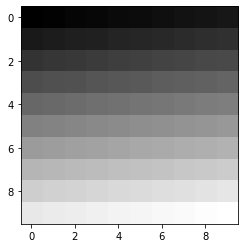

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

a = np.arange(100).reshape(10, 10)
plt.imshow(a, 'gray')
plt.show()

Source: 
* Advent of code 2016 - https://adventofcode.com/2016/day/8
* 10x - https://lms.10x.org.il/    



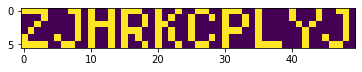

In [6]:
import numpy as np 
from matplotlib import pyplot as plt

a = np.zeros((6, 50))
with open("led_input.txt") as f:
    for line in f:
        op, p1, p2 = line.split()
        p1, p2 = int(p1), int(p2)
        if op == "+":
            a[:p2,:p1] = 1
        if op == ">":
            a[p1] = np.roll(a[p1], p2)
        if op == "v":
            a[:,p1] = np.roll(a[:,p1], p2)
plt.imshow(a)